In [3]:
from keras.models import Sequential
from keras import models, layers
import keras

import pandas as pd
import seaborn as sns


In [4]:
train = pd.read_csv("./train.csv")
#test = pd.read_csv("./digit-recognizer/test.csv")
print(train.head())

   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

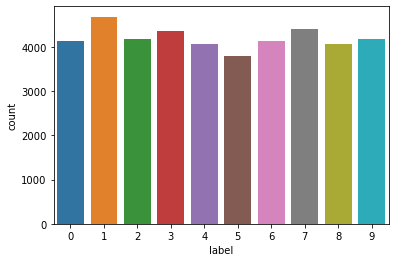

In [5]:
Y_train = train["label"]

#Drop 'Label' Column
X_train = train.drop(labels = ["label"], axis=1)

# free some space
del train

g= sns.countplot(Y_train)
Y_train.value_counts()

In [6]:
#We perform a grayscale normalization to reduce the effect of illumination's differences.

#Normalize the data

X_train = X_train/255.0
#test = test/255.0

In [7]:
#Reshape Image in 3 Dimensions (Height = 28Px, Width=28Px, Canal=1)

X_train= X_train.values.reshape(-1,28,28,1)
#test = test.values.reshape(-1,28,28,1)

In [8]:
# Label Encoding
from keras.utils import to_categorical
Y_train = to_categorical(Y_train, num_classes= 10)

In [9]:
# Split The train and test 10% and 90%
from sklearn.model_selection import train_test_split
random_seed =2
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train,test_size=0.1, random_state=random_seed)

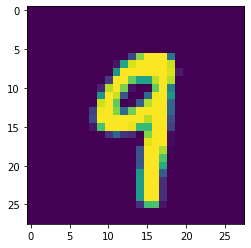

In [10]:
import matplotlib.pyplot as plt
g=plt.imshow(X_train[2][:,:,0])

In [11]:
#Instantiate an empty model
model = Sequential()

#C1 Convolution Layer
model.add(layers.Conv2D(filters= 6, kernel_size=(5, 5), strides=(1,1),activation='tanh', input_shape=(28,28,1),padding="same"))

#S2 Pooling Layer
model.add(layers.AveragePooling2D(pool_size=(2,2), strides=(1,1),padding='valid'))

#C3 Convolution Layer
model.add(layers.Conv2D(filters= 16, kernel_size=5, strides=1, activation='tanh', padding='valid'))

#S4 Pooling Layer
model.add(layers.AveragePooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))

#C5 Fully Connected Convolution Layer
model.add(layers.Conv2D(filters=120, kernel_size=(5,5), strides=(1,1), activation='tanh', padding='valid'))

#Flatten the CNN output so that we can connect it with fully connected layers
model.add(layers.Flatten())

#FC6 Fully Connected Layer
model.add(layers.Dense(84,activation='tanh'))

#Output Layer with softmax activation
model.add(layers.Dense(10,activation='softmax'))

#compile the model
model.compile(loss=keras.losses.categorical_crossentropy, optimizer='SGD', metrics=["accuracy"])



In [12]:
hist = model.fit(x=X_train, y=Y_train, epochs=10, batch_size=128,
                validation_data=(X_val,Y_val), verbose=1)

Epoch 1/10
296/296 [==============================] - 55s 187ms/step - loss: 0.7945 - accuracy: 0.8077 - val_loss: 0.4172 - val_accuracy: 0.88058s - loss: 2.2706 - accuracy: 0.181 - ETA: 49s - loss: 2.2636 - ac - ETA: 51s - loss: 2.1522 - accuracy: 0. - ETA: 50s - loss: 2.1158 - accur - ETA: 48s - loss: 1.9937 - accuracy: 0. - ETA: 48s - los - ETA: 42s - loss: 1.6239 - accuracy: 0. - ETA: 42s - loss: 1.5841 - accuracy - ETA: 40s - loss: 1.5120 - accuracy: 0. - ETA: 39s - loss: 1.4779 - accuracy: 0.66 - ETA: 39s - loss: 1.4626 - accura - ETA: 37s - loss: 1.3891 - accuracy: 0. - ETA: 36s - loss: 1.3616 - accuracy: 0.690 -  - ETA: 28s - loss: 1.1388 - accuracy - ETA: 26s - loss: 1.1071 - accur - ETA: 24s - loss: 1.0696 - accura - ETA: 22s - loss: 1.0372 - accuracy: 0.75 - ETA: 22s - l - ETA: 16s - loss: 0.9545 - acc - ETA: 14s - loss: 0.9255 - acc - ETA: 11s - loss: 0.8994 - accuracy: 0.78 - ETA: 11s - loss: 0.8957 - accuracy: 0.78 - ETA: 11s - loss: 0.8923 -  - ETA: 9s - loss: - ETA: 6s 

In [13]:
#Evaluate the Model

test_score=model.evaluate(X_val,Y_val)
print("Test loss{:.4f}, accuracy{:.2f}%".format(test_score[0],test_score[1]*100))


132/132 [==============================] - 5s 40ms/step - loss: 0.1722 - accuracy: 0.9529
Test loss0.1722, accuracy95.29%


NameError: name 'c' is not defined

Text(0, 0.5, 'Loss')

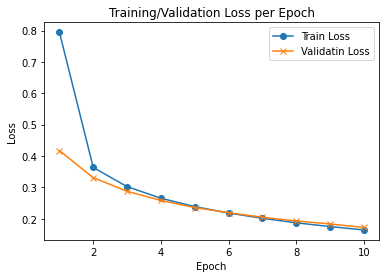

In [15]:
f, ax = plt.subplots()
ax.plot([None] + hist.history['loss'],'o-')
ax.plot([None] + hist.history['val_loss'],'x-')

# Plot legend and use the best location automatically: loc = 0.

ax.legend(['Train Loss', 'Validatin Loss'], loc=0)
ax.set_title('Training/Validation Loss per Epoch')
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')